In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter 
import powerlaw 
from tqdm import tqdm 

## Python Implementation 
Here there is a simpler implementation that the one I did using `C++`

In [2]:
def std_ssr(n):
    value = n
    while value != 1:
        next_state = np.random.choice(np.arange(1, value))
        yield int(next_state)
        value = next_state
def noisy_ssr(n, lam):
    current_state = n
    while current_state > 1:
        u = np.random.rand()
        if u < lam:
            next_state = np.random.randint(1, current_state)
        else:
            next_state = np.random.randint(1, n)
        yield next_state
        current_state = next_state
def cascade_ssr(n, mu):
    balls = [n]
    base_balls = 1
    decimal_part = mu - base_balls
    
    while balls:
        new_balls = []
        for current_state in balls:
            if current_state != n:
                yield current_state
            if current_state > 1:
                num_new_balls = base_balls
                if np.random.rand() < decimal_part:
                    num_new_balls += 1
                for _ in range(num_new_balls):
                    next_state = np.random.randint(1, current_state)
                    yield next_state  
                    new_balls.append(next_state)
        balls = new_balls

ERROR! Session/line number was not unique in database. History logging moved to new session 13


In [3]:
N = 1001 
mu = 1.0 

In [4]:
%%timeit
for _ in range(1000):
    ssr = list(cascade_ssr(N, mu))

33.3 ms ± 691 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [187]:
n_runs = 3000 
n = 10_001
# mu = 2.0
mus = [0.5, 1.0, 1.5, 2.0]
lam = 1.5
all_arr = []
for mu in tqdm(mus, desc="Running..."): 
    arr = []
    for _ in range(n_runs):
        a = cascade_ssr(n, mu)
        arr.extend(a)
    all_arr.append(arr)

Running...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:02<00:00, 30.67s/it]


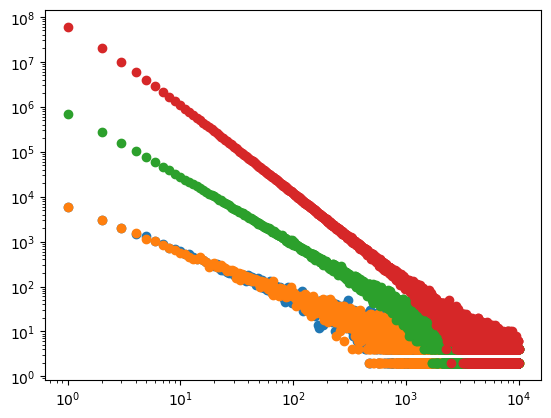

In [188]:
for arr in all_arr:
    counter = Counter(arr)
    counter = counter.most_common()
    labels, values = zip(*counter)
    plt.scatter(labels, values)
    plt.xscale("log")
    plt.yscale("log")
plt.show()

In [182]:
fit = powerlaw.Fit(arr[:], discrete=True, verbose=False)
print(f"\n\nxmin :{fit.xmin}")
print(f"alpha :{fit.alpha}")
print(f"D :{fit.D}")

xmin progress: 99%

xmin :2.0
alpha :1.4993031796157985
D :0.019598524339069445


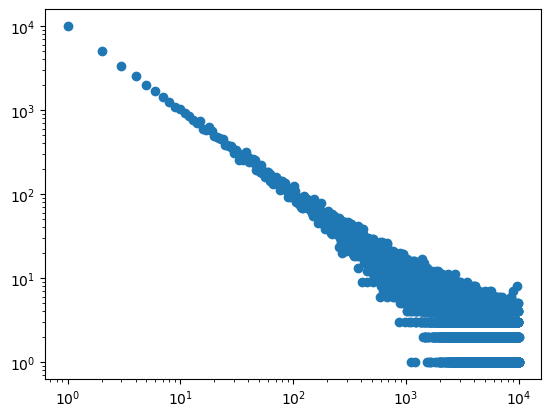